# Code improvements of section 5.5 RFM Analysis from the book
## Supply Chain Analytics
### Concepts, Techniques and Applications
#### Kurt Y. Liu

Liu, K. (2022). Supply Chain Analytics: Concepts, Techniques and Applications. Palgrave Macmillan.

Author of improvements: **Conrado Zarate Badillo** <br>
Date of creation: Monday August 29 2022.<br>
Date of last modification: Tuesdayy August 30 2022

## Contents of 5.5 RFM Analysis or Customer Segmentation Techniques
<a id='C5.5'></a>

* [*5.5 RFM Analysis*](#5.5)
* [*5.5.1 What Is RFM?*](#5.5.1)
* [*5.5.2 What Is RFM Analysis?*](#5.5.2)
* [*5.5.3 Steps for RFM Analysis*](#5.5.3)
* [*5.5.4 RFM Analysis Example in Python*](#5.5.4)
    * [*5.5.4.1 Recency*](#5.5.4.1)
    * [*5.5.4.2 Frecuency*](#5.5.4.2)
    * [*5.5.4.3 Monetary value*](#5.5.4.3)
    * [*5.5.4.4 Create dataframe of RFM*](#5.5.4.4)</br>
<span style='background:lightblue'> [*5.5.4.5 Alternative or compact form to Create dataframe of RFM*](#5.5.4.5)</span>
* [*5.5.5 RFM Scores*](#5.5.5)
    * [*5.5.5.1 Another way to get the RFM scores by using qcut() method.*](#5.5.5.1)
    * [*5.5.5.2  Customer Segmentation.*](#5.5.5.2)
* [*5.6 Clustering Algorithms for customer segmentation*](#5.6)
    * [*5.6.1 Feature Scaling*](#5.6.1)
        * [*5.6.1.1 log transformation as sort of Normalization*](#5.6.1.1)
            * [*5.6.1.1.1 Applying K-Means clustering to df_rfm_log*](#5.6.1.1.1)
        * [*5.6.1.2 Standardization with StandardScaler() to df_rfm_log*](#5.6.1.2) 
    * [*5.6.2 Applying K-Means clustering*](#5.6.2)
    * [*5.6.3 Visualising clusters*](#5.6.3)
    * [*5.6.4 Determining the right number of clusters*](#5.6.4)
* [*5.7 References*](#5.7)

## 5.5 RFM Analysis
<a id='5.5'></a>

RFM (Recency, Frequency, Monetary):
    
- **RECENCY (R)**: Time since last order
- **FREQUENCY (F)**: Total number of orders or average time between orders
- **MONETARY VALUE (M)**: Total or average order value

RFM analysis is **a useful customer segmentation technique**, which has been widely adopted in marketing research. It can help categorize customers into various clusters and thus allowing businesses to target specific customer groups with tailored communications, engagement campaigns, and special treatment that are much more relevant for each group.

In this section, we introduce the basics of RFM analysis and use an example to demonstrate how we can perform the analysis in Python.

[Return to Content of 5.5 RMF Analysis](#C5.5)

## 5.5.1 What Is RFM?
<a id='5.5.1'></a>

RFM stands for Recency, Frequency, and Monetary, each corresponding to some key customer values.

The three RFM metrics are important indicators of a customer’s behaviour as **they can reflect customer retention, engagement, and lifetime value**.

• **Recency** refers to how recent a customer has made a purchase. 
<span style='background:lightblue'>It measures the time elapsed since a customer’s last order or transaction with a business.</span> <span style='background:cyan'> A high recency score usually means that a customer has positively considered your business for a purchase decision over competitors.</span> It might be more likely that the customer will be responsive to communications and engagement campaigns from your business.

• **Frequency** refers to how often a customer makes a purchase. <span style='background:lightblue'> It can be measured with the total number of orders from a customer over a particular period of time or with average time between orders.</span> A high frequency score usually means that the customer is actively engaged and loyal to your business.

• **Monetary** refers to how much money a customer has spent in total or on average over a particular period of time.<span style='background:cyan'> A high monetary score usually means that the customer is a big spender to whom your business should pay close attention.</span>

[Return to Content of 5.5 RMF Analysis](#C5.5)

## 5.5.2 What is RFM Analysis?
<a id='5.5.2'></a>

When performing customer segmentation, evaluating customers based on a single metric is insufficient and can be biased sometimes. For instance, an overseas tourist has made a recent visit to a retail store but will never come back again. Though the customer may have a high recency score, it can be difficult to retain this type of customers and thus, they cannot be regarded as best customers for the business.

RFM analysis combines the three different customer attributes and classifies customers with a numeric ranking of the three metrics, thus leading to a more balanced view. In general, customers with the highest overall score are considered best customers, depending on business contexts.

RFM analysis is a popular method for customer segmentation because it is simple to perform, and its output can be easily interpreted and understood. 

In particular, RFM can help address the following questions:
1. Who are the most valuable customers?
2. Who has the potential to become more valuable customers?
3. Which customers can be retained?
4. Which customers are more likely to respond to engagement campaigns?

[Return to Content of 5.5 RMF Analysis](#C5.5)

## 5.5.3 Steps for RFM Analysis
<a id='5.5.3'></a>

There are certain steps to follow when performing an RFM analysis:
1. **Set RFM analysis scope** This is the step to determine the period that your RFM analysis to cover, for example, you can conduct RFM analysis for the past 3 or 6 months, or even longer. Of course, this also depends on the availability of your data. This step is important as it sets a reference date point for calculating the three R, F, M scores.

2. **Calculate R, F, M values** Once the scope is determined, you can calculate the R, F, and M values, respectively.

For instance, to calculate R, simply deduct a customer’s most recent purchase date from today’s date, the difference gives the R value (e.g., 1, 10, or 120 days). 

To calculate F, you can either calculate the total number of orders from a customer over a particular period of time, or use average
time between orders. Obviously, for the first option, the higher the better; whereas for the second option, the smaller the better. Likewise, for M value, you can either work out the total money a customer has spent during the timeframe, or use average money spent per order (see Table 5.2).

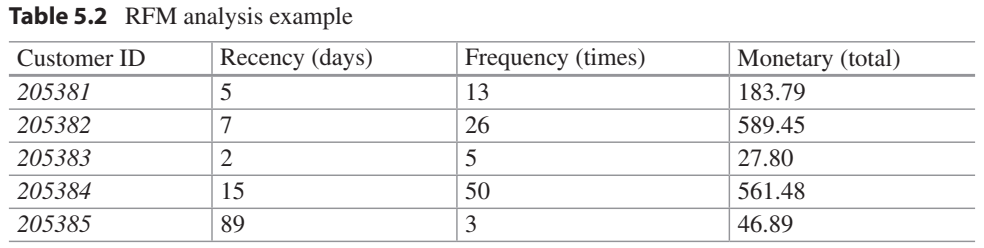

3. Convert R, F, M values to scale scores—this is the step in which we convert the three R, F, M values to scale scores. Different businesses may use different scales, while **the most common one is 1–5 scale**. To define the scales, we can set fixed ranges or work out quantiles based on the three respective R, F, M values.

To give you an example, we can divide the R value distribution into five equal groups using four quantiles (i.e., [0.2, 0.4, 0.6, 0.8]), and any values below the first 0.2 quantile value will be assigned a score of 5. 

Note here that a smaller R value means a more recent purchase/visit from customer, thus a high R scale score of 5. Similarly, we can calculate the quantiles for F and M values and then assign the scale scores to each customer.

4. **Apply RFM formula for aggregated RFM scores** you can stop at the previous stage, and simply use the individual R, F, M scale scores for customer segmentation (e.g., 1-1-1 for a low segment, and 555 for a high segment).

Alternatively, businesses can come up a formula of their own to derive an aggregated RFM score for each customer. For instance, using average of the three RFM scale scores or the sum. Depending on the nature of the business, you might introduce different weights for the three RFM variables to arrive at a more relevant RFM score to your business. For example, monetary value per transaction can be more important for a piano shop than the other two metrics, compared to a convenient store, where recency and frequency can be considered more important (Table 5.3).

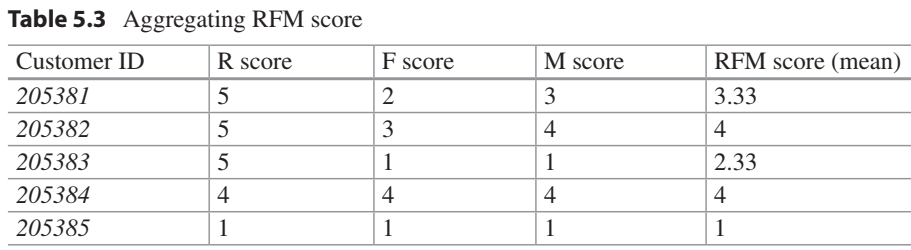

5. **Segment customers** The final step is to create customer segmentations based on the RFM scores.
Again, depending on the nature of the business, you can decide a most suitable way of dividing customers into different segments. See Table 5.4 for an illustrative example.

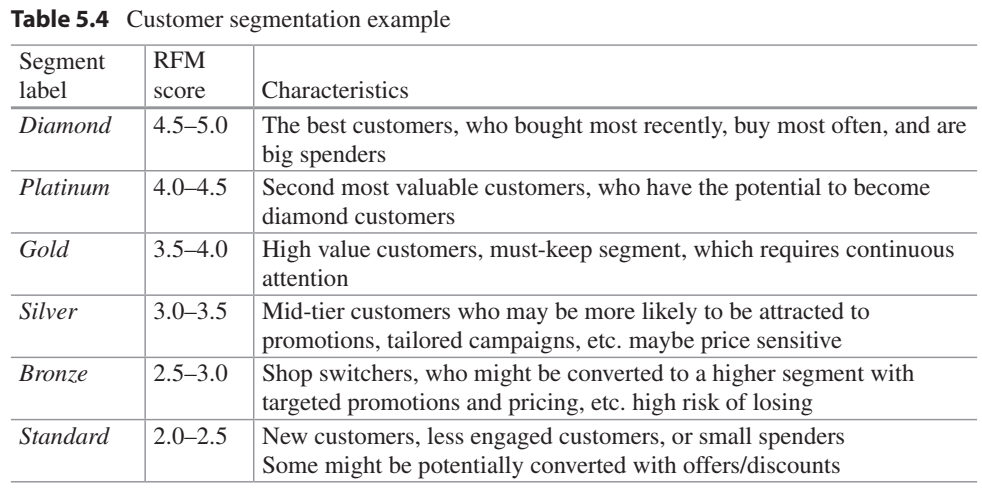

The example contains arbitrary labels and tiers, which should be tailored to suit the needs of a particular business. Using RFM segmentation, organizations can develop effective retention strategies and tactics for each segment. For instance, the top tier Diamond and Platinum segments are the most loyal customers who may be more willing to try your new products and promote your brand. The Silver and Bronze customers may be more sensitive to pricing and promotions. As such, your business can offer tailored promotions and targeted pricing strategies in order to retain them and potentially convert some of them to a higher tier segment.

[Return to Content of 5.5 RMF Analysis](#C5.5)

## 5.5.4 RFM Analysis Example in Python
<a id='5.5.4'></a>

In this section, we go through an RFM analysis example in Python. The data for the analysis is the one exported from **Ex. 5.2 in the cohort analysis**. First, we need to load the data:

In [2]:
#IMPORT MODULES
import pandas as pd
import numpy as np
import datetime as dt

# visualization
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns; sns.set()

%matplotlib inline

In [3]:
# load the data
df_uk = pd.read_excel('UK_Data.xlsx',index_col=0)
df_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


If you could recall, the dataset covers invoice dates from 2010-12-01 to
2011-12-09. For simplicity, let us just take this whole period for our analysis. To calculate Recency value, we need to get a reference date. Consider the following code:

Now, we'll go through the RFM analysis step by step.

### 5.5.4.1 Recency
<a id='5.5.4.1'></a>

[Return to Content of 5.5 RMF Analysis](#C5.5)

In [4]:
# get the reference date
ref = df_uk.InvoiceDate.dt.date.max()
ref

datetime.date(2011, 12, 9)

Since `InvoiceDate` column contains time values, we need to convert the column to date only values:

In [5]:
# convert InvoicedDate to date only
df_uk.InvoiceDate = df_uk.InvoiceDate.dt.date

In [6]:
df_uk.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom,20.34


In [10]:
df_uk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333828 entries, 0 to 397908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    333828 non-null  int64  
 1   StockCode    333828 non-null  object 
 2   Description  333828 non-null  object 
 3   Quantity     333828 non-null  int64  
 4   InvoiceDate  333828 non-null  object 
 5   UnitPrice    333828 non-null  float64
 6   CustomerID   333828 non-null  int64  
 7   Country      333828 non-null  object 
 8   Amount       333828 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 33.5+ MB


In [18]:
df_uk.CustomerID.describe()

count    333828.000000
mean      15558.366380
std        1592.032041
min       12747.000000
25%       14215.000000
50%       15529.000000
75%       16931.000000
max       18287.000000
Name: CustomerID, dtype: float64

We can then get Recency values for each customer by calculating the difference between the reference date (i.e., 2011-12-09) and the most recent date when a customer made a purchase. Consider below, where we groupby CustomerID and apply a lambda function on InvoiceDate:

In [40]:
# for each row of `df_uk`
# returns a `groupby` pandas object of `InvoiceDate` grouped by `CustomerID`
# here the key is `CustomerID`,
# then it splits `df_uk` `InvoiceDate` data by this key
# then calculates the difference of days between `ref` and `InvoiceDate`
# ref=(2011, 12, 9) which is the most recent date of `df_uk`  
#  then `days` are assumed to be possitive
recency = df_uk.groupby('CustomerID')['InvoiceDate'].\
          apply(lambda x: (ref - x.max()).days)

In [25]:
recency

CustomerID
12747      2
12748      0
12749      3
12820      3
12821    214
        ... 
18280    277
18281    180
18282      7
18283      3
18287     42
Name: InvoiceDate, Length: 3818, dtype: int64

In [9]:
type(recency)

pandas.core.series.Series

In [28]:
# recency days of `CustomerID`=12748
recency[12748]

0

In [36]:
df_uk[df_uk['CustomerID'].eq(12748)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
1005,536521,22854,CREAM SWEETHEART EGG HOLDER,1,2010-12-01,4.95,12748,United Kingdom,4.95
2512,536641,22187,GREEN CHRISTMAS TREE CARD HOLDER,1,2010-12-02,4.25,12748,United Kingdom,4.25
6063,537136,20894,HANGING BAUBLE T-LIGHT HOLDER LARGE,1,2010-12-05,2.95,12748,United Kingdom,2.95
6064,537136,85018D,YULETIDE IMAGES S/6 PAPER BOXES,1,2010-12-05,2.55,12748,United Kingdom,2.55
6065,537136,21413,PERIWINKLE T-LIGHT HOLDER,1,2010-12-05,1.25,12748,United Kingdom,1.25
...,...,...,...,...,...,...,...,...,...
397870,581580,21351,CINAMMON & ORANGE WREATH,1,2011-12-09,6.75,12748,United Kingdom,6.75
397871,581580,22698,PINK REGENCY TEACUP AND SAUCER,1,2011-12-09,2.95,12748,United Kingdom,2.95
397872,581580,22567,20 DOLLY PEGS RETROSPOT,1,2011-12-09,1.45,12748,United Kingdom,1.45
397873,581580,79321,CHILLI LIGHTS,2,2011-12-09,5.75,12748,United Kingdom,11.50


We confirm `recency`=0 for `CustomerID`=12748 has it last `InvoiceDate`=`ref`

In [26]:
# maximun recency days 
recency.max()

373

In [39]:
# an alternative form to get same rencency results
rencency2=df_uk['InvoiceDate'].\
groupby(df_uk['CustomerID']).apply(lambda x: (ref - x.max()).days)
rencency2

CustomerID
12747      2
12748      0
12749      3
12820      3
12821    214
        ... 
18280    277
18281    180
18282      7
18283      3
18287     42
Name: InvoiceDate, Length: 3818, dtype: int64

We sampled top five customers as indicated above, for example, customer ID
12748 purchased on the reference date, whereas customer ID 12821 had not made any purchase for 214 days

### 5.5.4.2 Frequency
<a id='5.5.4.2'></a>

[Return to Content of 5.5 RMF Analysis](#C5.5)

To calculate Frequency values, we can use the total number of unique invoice
number per customer. Consider below:

We'll use the number of unique `InvoiceNo` per `CustomerID` to calculate the frequency

nunique() Returns the number of unique elements in the object.
df_uk.InvoiceNo.nunique()

In [42]:
freqency = df_uk.groupby('CustomerID')['InvoiceNo'].nunique() 
freqency

CustomerID
12747     11
12748    200
12749      5
12820      4
12821      1
        ... 
18280      1
18281      1
18282      2
18283     16
18287      3
Name: InvoiceNo, Length: 3818, dtype: int64

### 5.5.4.3 Monetary
<a id='5.5.4.3'></a>

[Return to Content of 5.5 RMF Analysis](#C5.5)

For Monetary values, we can use the total amount spent by each customer over
the entire period:
We'll use the total amount spent by customers over the period to get the Monetary table

In [43]:
# gets the sum of `Amount` per each `CustomerID`
monetary = df_uk.groupby('CustomerID')['Amount'].sum()
monetary.head()

CustomerID
12747     3073.41
12748    24891.45
12749     4032.98
12820      923.62
12821       92.72
Name: Amount, dtype: float64

Let's combine the three RFM values and createRFM Dataframe

## 5.5.4.4 Create dataframe of RFM
<a id='5.5.4.4'></a>
After getting all three R, F, and M values, we can combine them into one
DataFrame. There are different ways to achieve this. As an example, consider below:

[Return to Content of 5.5 RMF Analysis](#C5.5)

In [44]:
# Combine Recency and Frequency first
# `to_frame` Convert `Recency` Series to a DataFrame
# then this new df it is joined with another Series (Frequency) to a DataFrame
df_rf = recency.to_frame(name='Recency').\
              join(freqency.to_frame(name='Frequency'))

# then Monetary converted from Series to DF is joined with df_rf
df_rfm = df_rf.join(monetary.to_frame(name='Monetary'))
df_rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12747,2,11,3073.41
12748,0,200,24891.45
12749,3,5,4032.98
12820,3,4,923.62
12821,214,1,92.72


## 5.5.4.5 Alternative or compact form to Create dataframe of RFM
<a id='5.5.4.5'></a>

This alternative process can omit all the preceding cells, so it can run independently in order to speed up the analysis on the remaining cells of this program.

[Return to Content of 5.5 RMF Analysis](#C5.5)

In [1]:
#IMPORT MODULES
import pandas as pd
import numpy as np
import datetime as dt

# visualization
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns; sns.set()

%matplotlib inline

In [2]:
# load the retail data for UK
df_uk = pd.read_excel('UK_Data.xlsx',index_col=0)
# get the reference date
ref = df_uk.InvoiceDate.dt.date.max()
# convert InvoicedDate to date only
df_uk.InvoiceDate = df_uk.InvoiceDate.dt.date

Aggregations refer to any data transformation that produces scalar values from arrays. You can use aggregations of your own devising and additionally call any method that is also defined on the grouped object. (McKinney, 2018). 

In [3]:
# alternative (might be easier) way to create RFM dataframe
# As a single key is CustomerID for Recency Frequency and Monetary
# the groupby operation can be perfomed with data aggregation on those
# 3 features
# GroupBy agg() method.
RMF = df_uk.groupby(['CustomerID']).\
        agg({'InvoiceDate': lambda x: (ref - x.max()).days,
             'InvoiceNo': 'nunique', 'Amount': 'sum'})

RMF.rename(columns={'InvoiceDate': 'Recency',
                    'InvoiceNo': 'Frequency', 
                    'Amount': 'Monetary'}, inplace=True)

RMF.head()

,Recency,Frequency,Monetary
CustomerID,,,
12747,2,11,3073.41
12748,0,200,24891.45
12749,3,5,4032.98
12820,3,4,923.62
12821,214,1,92.72


In [9]:
RMF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3818 entries, 12747 to 18287
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    3818 non-null   int64  
 1   Frequency  3818 non-null   int64  
 2   Monetary   3818 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 119.3 KB


If we have ran all the preceding cells of 5.5.4.5 then we will have two different dataframes with same data df_rfm and RMF. Otherwise we could copy RMF to df_rfm so we can preserve the same DF name along the remaining cells of this programs as it is the original 5.5 section in the book of Liu, K. (2022).

In [4]:
# optional if we started this program on 5.5.4.5 section
df_rfm = RMF.copy()

In [5]:
df_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3818 entries, 12747 to 18287
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    3818 non-null   int64  
 1   Frequency  3818 non-null   int64  
 2   Monetary   3818 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 119.3 KB


The next step is to convert the respective R, F, and M values into scale scores. As previously mentioned, we can use quantiles to determine five equal sized groups, thereby assigning R, F, and M values on a 1–5 scale.

### RFM Scores
<a id='5.5.5'></a>

[Return to Content of 5.5 RMF Analysis](#C5.5)

Now, let's assign scale scores. In order to do it, we can use quantiles,  you can think of this as dividing the data into 5 equally sized groups.

In [6]:
print('Recency Min:',df_rfm.Recency.min(),
      'Recency Median:',df_rfm.Recency.median(),
      'Recency Max:',df_rfm.Recency.max());
print('Frequency Min:',df_rfm.Frequency.min(),'Frequency Max:',df_rfm.Frequency.max());
print('Monetary Min:',df_rfm.Monetary.min(),'Monetary Max:',df_rfm.Monetary.max())

Recency Min: 0 Recency Median: 50.0 Recency Max: 373
Frequency Min: 1 Frequency Max: 200
Monetary Min: 1.9 Monetary Max: 49389.26


The quantile function divides the data into equal halves, in which the median acts as middle and over that the remaining lower part is lower quartile and upper part is upper quartile.
https://www.digitalocean.com/community/tutorials/quantile-function-in-r

In [7]:
df_rfm.Recency.describe()

count    3818.000000
mean       91.751964
std        99.502077
min         0.000000
25%        17.000000
50%        50.000000
75%       144.000000
max       373.000000
Name: Recency, dtype: float64

In [8]:
# Get 4 quantiles values
Quantiles = df_rfm.quantile(q=[0.2, 0.4, 0.6, 0.8])
Quantiles

,Recency,Frequency,Monetary
0.2,12.0,1.0,197.766
0.4,32.0,2.0,393.700
0.6,70.0,3.0,734.940
0.8,178.6,5.0,1576.588


So, for example the CustomerID with Recency values from 0 to 12 will be in quantile 0.2, for Recency > 12 & <=32 will be in quantile=0.4 and so for. Later firs q=0.2 can have the highest score=5, q=0.4 score=4, etc.

As shown above, the quantile() method has conveniently produced four
quantile values for each metric in the columns.

Based on these values, we can convert the three R, F, M values into scale scores.

First, we need to define a function for R score conversion:

In [9]:
# First, we define a Rscore function to assign Recency scores

def Rscore(x, q, df):   # x=value, q=column, df=dataframe
    """
    gets the score values for Recency values.
    requires x: as Recency value, q:as quantile values 
    and df:as dataframe data
    """
    if x <= df[q][0.2]: # if x < first quantile value
        return 5        # return 5 as it is most recent.
    elif x <= df[q][0.4]:
        return 4
    elif x <= df[q][0.6]:
        return 3
    elif x <= df[q][0.8]:
        return 2
    else:
        return 1

Note that since we will use `df_rfm` for other purpose later, we shall create a copy of the DataFrame and then apply the function to derive R score.
Consider below:

In [10]:
# create a copy of the dataframe to calculate the R score
rfm_copy = df_rfm.copy()

In [11]:
# convert to R score
# creates a new feature "Rscore" on `rfm_copy` dataframe
rfm_copy['Rscore'] = rfm_copy['Recency'].\
                        apply(Rscore, args=('Recency', Quantiles))
rfm_copy.head()

,Recency,Frequency,Monetary,Rscore
CustomerID,,,,
12747,2,11,3073.41,5
12748,0,200,24891.45,5
12749,3,5,4032.98,5
12820,3,4,923.62,5
12821,214,1,92.72,1


Likewise, we can define a function for F and M scores conversion and call it to create Fscore and Mscore columns in the rfm_copy DataFrame. See below:

In [12]:
# Likewise, we can define a function to assign FM scores for each customer

def FMscore (x, q, df):        
    if x <= df[q][0.2]:     
        return 1             
    elif x <= df[q][0.4]:
        return 2
    elif x <= df[q][0.6]:
        return 3
    elif x <= df[q][0.8]:
        return 4
    else:
        return 5

In [13]:
rfm_copy['Fscore'] = rfm_copy['Frequency'].\
                    apply(FMscore,args=('Frequency',Quantiles))
rfm_copy['Mscore'] = rfm_copy['Monetary'].\
                    apply(FMscore,args=('Monetary',Quantiles))
rfm_copy.head()

,Recency,Frequency,Monetary,Rscore,Fscore,Mscore
CustomerID,,,,,,
12747,2,11,3073.41,5,5,5
12748,0,200,24891.45,5,5,5
12749,3,5,4032.98,5,4,5
12820,3,4,923.62,5,4,4
12821,214,1,92.72,1,1,1


[Return to Content of 5.5 RMF Analysis](#C5.5)

### 5.5.5.1 Another way to get the RFM scores by using qcut() method.
<a id='5.5.5.1'></a>

[Return to Content of 5.5 RMF Analysis](#C5.5)

Alternatively, we can use pd.qcut() method to get the R, F, and M scores. 

The pandas documentation describes qcut as a “Quantile-based discretization function.” This basically means that qcut tries to divide up the underlying data into equal sized bins. The function defines the bins using percentiles based on the distribution of the data, not the actual numeric edges of the bins.

In [14]:
#for R range it creates a reverse range to be used in labelling below.
# this is due that the lesser the Recency value the higher the score
r_range = range(5, 0, -1) 
f_range = range(1, 6)
m_range = range(1, 6)

In [15]:
print("R range:",list(r_range),"\n"
      "F range:",list(f_range),"\n"
      "M range:",list(m_range))

R range: [5, 4, 3, 2, 1] 
F range: [1, 2, 3, 4, 5] 
M range: [1, 2, 3, 4, 5]


In [16]:
# creates a copy of original rfm_copy
rfm_another = df_rfm.copy()
# creates Rscore feature on rfm_another
rfm_another['Rscore'] = pd.qcut(rfm_another['Recency'],
                                q=5, labels=r_range)

# as the first quantile in Frequency is 1, which will conflict 
# with the label 1, we have to use a different method;
# otherwise, we will get error message;
# but we might have that identical values go into
# different quantiles due to pre-ranking.
rfm_another['Fscore'] = pd.qcut(rfm_another['Frequency'].\
                                rank(method='first'),
                                q=5, labels=f_range)
rfm_another['Mscore'] = pd.qcut(rfm_another['Monetary'],
                                q=5, labels=m_range)

rfm_another.head()

,Recency,Frequency,Monetary,Rscore,Fscore,Mscore
CustomerID,,,,,,
12747,2,11,3073.41,5,5,5
12748,0,200,24891.45,5,5,5
12749,3,5,4032.98,5,4,5
12820,3,4,923.62,5,4,4
12821,214,1,92.72,1,1,1


[Return to Content of 5.5 RMF Analysis](#C5.5)

### 5.5.5.2 Customer Segmentation
<a id='5.5.5.2'></a>

[Return to Content of 5.5 RMF Analysis](#C5.5)

For customer segmentation, we can use the aggregate RFM scores by simply taking the average of the R, F, M scores derived above. Consider below:

In [17]:
# we use the avavage of R,F,and M scores for RFM score
rfm_copy['RFMscore'] = rfm_copy[['Rscore', 'Fscore', 
                                 'Mscore']].mean(axis=1)  

rfm_copy.head()

,Recency,Frequency,Monetary,Rscore,Fscore,Mscore,RFMscore
CustomerID,,,,,,,
12747,2,11,3073.41,5,5,5,5.000000
12748,0,200,24891.45,5,5,5,5.000000
12749,3,5,4032.98,5,4,5,4.666667
12820,3,4,923.62,5,4,4,4.333333
12821,214,1,92.72,1,1,1,1.000000


Now, depending on what values most to your business, you can segement customers into different groups, for example:

- Frequent buyers
- Big spenders
- Plantium customers
- Gold customers, etc.

Finally, based on the RFM score we can segment customers into different groups. As an example, we arbitrarily divide them into **six groups** by defining the following function:

In [18]:
# we define a function to segement customers

def segment(df):
    if df.RFMscore <= 1:
        return 'Basic'
    elif df.RFMscore <= 2:
        return 'Bronze'
    elif df.RFMscore <= 3:
        return 'Silver'
    elif df.RFMscore <= 4:
        return 'Gold'
    elif df.RFMscore <= 4.5:
        return 'Platinum'
    else:
        return 'Diamond'

In [19]:
rfm_copy['LoyaltyGroup'] = rfm_copy.apply(segment, axis=1)
rfm_copy.head(n=10)

,Recency,Frequency,Monetary,Rscore,Fscore,Mscore,RFMscore,LoyaltyGroup
CustomerID,,,,,,,,
12747,2,11,3073.41,5,5,5,5.000000,Diamond
12748,0,200,24891.45,5,5,5,5.000000,Diamond
12749,3,5,4032.98,5,4,5,4.666667,Diamond
12820,3,4,923.62,5,4,4,4.333333,Platinum
12821,214,1,92.72,1,1,1,1.000000,Basic
12822,70,2,806.08,3,2,4,3.000000,Silver
12824,59,1,397.12,3,1,3,2.333333,Silver
12826,2,7,1460.80,5,5,4,4.666667,Diamond
12827,5,3,430.15,5,3,3,3.666667,Gold


Let's have a look at how many customers in each group:

In [20]:
rfm_score = rfm_copy.reset_index()
rfm_score.groupby('LoyaltyGroup')['CustomerID'].\
                 count().sort_values(ascending=False)

LoyaltyGroup
Bronze      1081
Silver       912
Gold         747
Diamond      555
Basic        270
Platinum     253
Name: CustomerID, dtype: int64

Once a business has segmented its customers, it can then develop specific strategies to target each segment for creating better customer service and experience. For
example, using promotions, offers, or discounts to retrain ‘shop switchers’, while
providing superior customer experience to make loyal customers feel more valued.

However, it is important to realize that, while RFM analysis can help effectively
segment customers into various tiers and create a quick snapshot of customers who
are most valuable to your business, it does not necessarily mean that the segmentation can accurately reflect what the customers desire and the true motivations behind their behaviours.

Whilst you can develop tailored engagement campaigns, marketing advertisements, prioritized nurturing, and loyalty programmes for each customer segment, they may not want to hear from you for all those kinds of efforts all the time.

Therefore, make sure you have a clever communication strategy in place and **do not overwhelm your customers with excessive emails and calls to promote your products**, which would certainly annoy them and eventually turn them away.

Remember that **a high RFM score may be a sign to further analyse those valuable customers and find their true motives behind their behaviours, rather than to try to
push more products to them right away**.

[Return to Content of 5.5 RMF Analysis](#C5.5)

## 5.6 Clustering Algorithms for customer segmentation
<a id='5.6'></a>

[Return to Content of 5.5 RMF Analysis](#C5.5)

We will use one of the most popular ML algorithms for customer segementation: **K-Means**. However, **KMeans assumes symmetric distribution**. We will plot the data and check:

In [21]:
from sklearn.cluster import KMeans

In [22]:
df_rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12747,2,11,3073.41
12748,0,200,24891.45
12749,3,5,4032.98
12820,3,4,923.62
12821,214,1,92.72


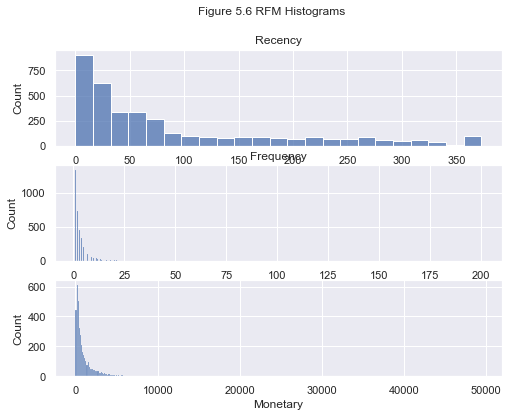

In [83]:
# plots the histograms for each feature, so we notice if they are normal distributions
fig, axs = plt.subplots(3, figsize=(8,6))
fig.suptitle("Figure 5.6 RFM Histograms")
sns.histplot(df_rfm['Recency'], ax=axs[0])
axs[0].set_title("Recency")
sns.histplot(df_rfm['Frequency'], ax=axs[1])
axs[1].set_title("Frequency")
sns.histplot(df_rfm['Monetary'], ax=axs[2]);

From the above figures, we can see that the data are right-skewed. We need to tranform the data before feeding them into the model.

[Return to Content of 5.5 RMF Analysis](#C5.5)

#### 5.6.1 Feature scaling
<a id='5.6.1'></a>

Up to this point, we should be well aware that the Recency and Frequency values are in the hundreds or 3 order of magnitude range, while the monetary values are in the 5th order of magnitude.

The following paragraphs were taken from (Gupta & Sehgal, 2021):
When data has attributes with varying scales, it may be helpful to **rescale**. Many machine learning algorithms can benefit from rescaling the attributes to all have the same scale.

Feature **scaling** is an important step in the data transformation stage of the data preparation process. Feature scaling is the method to limit the range of variables so that they can be compared on common grounds. Feature scaling is **a method for standardization** of independent features.

It means to adjust values of numeric features measured on different scales to a notionally common scale, without altering differences in the value’s ranges or losing information.

The goal is to improve the overall quality of the dataset by re-scaling the dimension of the data and avoiding situations in which some values over-weighting others.

The two most popular techniques of Feature Scaling are (Gupta & Sehgal, 2021):
1. Standardization
2. Normalization

**Standardizing**, a dataset involves rescaling the distribution of values so that the **mean** of observed values is **0** and the **standard deviation is 1**.  This can be thought of as subtracting the mean or **centering the data**.
Standardization assumes that observations fit a **Gaussian** distribution (bell curve) with a well-behaved mean and standard deviation. It requires that we know or are able to accurately estimate the mean and standard deviation of observable values. One may be able to estimate these values from training data, not the entire dataset
(Gupta & Sehgal, 2021).

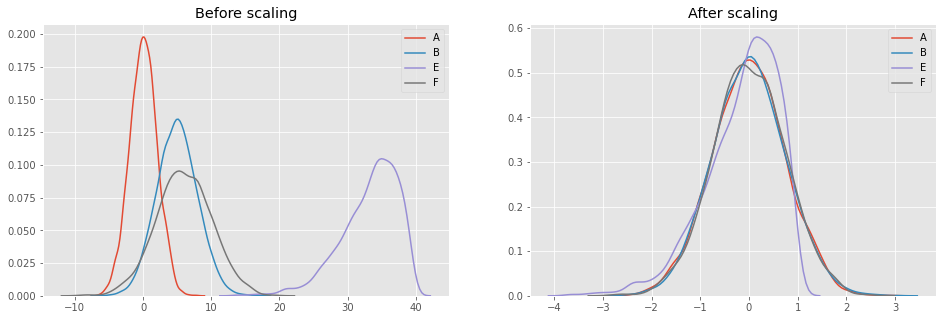
source:https://towardsdatascience.com/preprocessing-data-feature-scaling-cc28c508e8af

**Normalization (Min–Max Normalization)**
Normalization refers to rescaling the feature between min and max (usually between 0 and 1). To normalize the feature, subtract the min value from each feature instance and divide by the range of the feature (max–min) (Gupta & Sehgal, 2021).

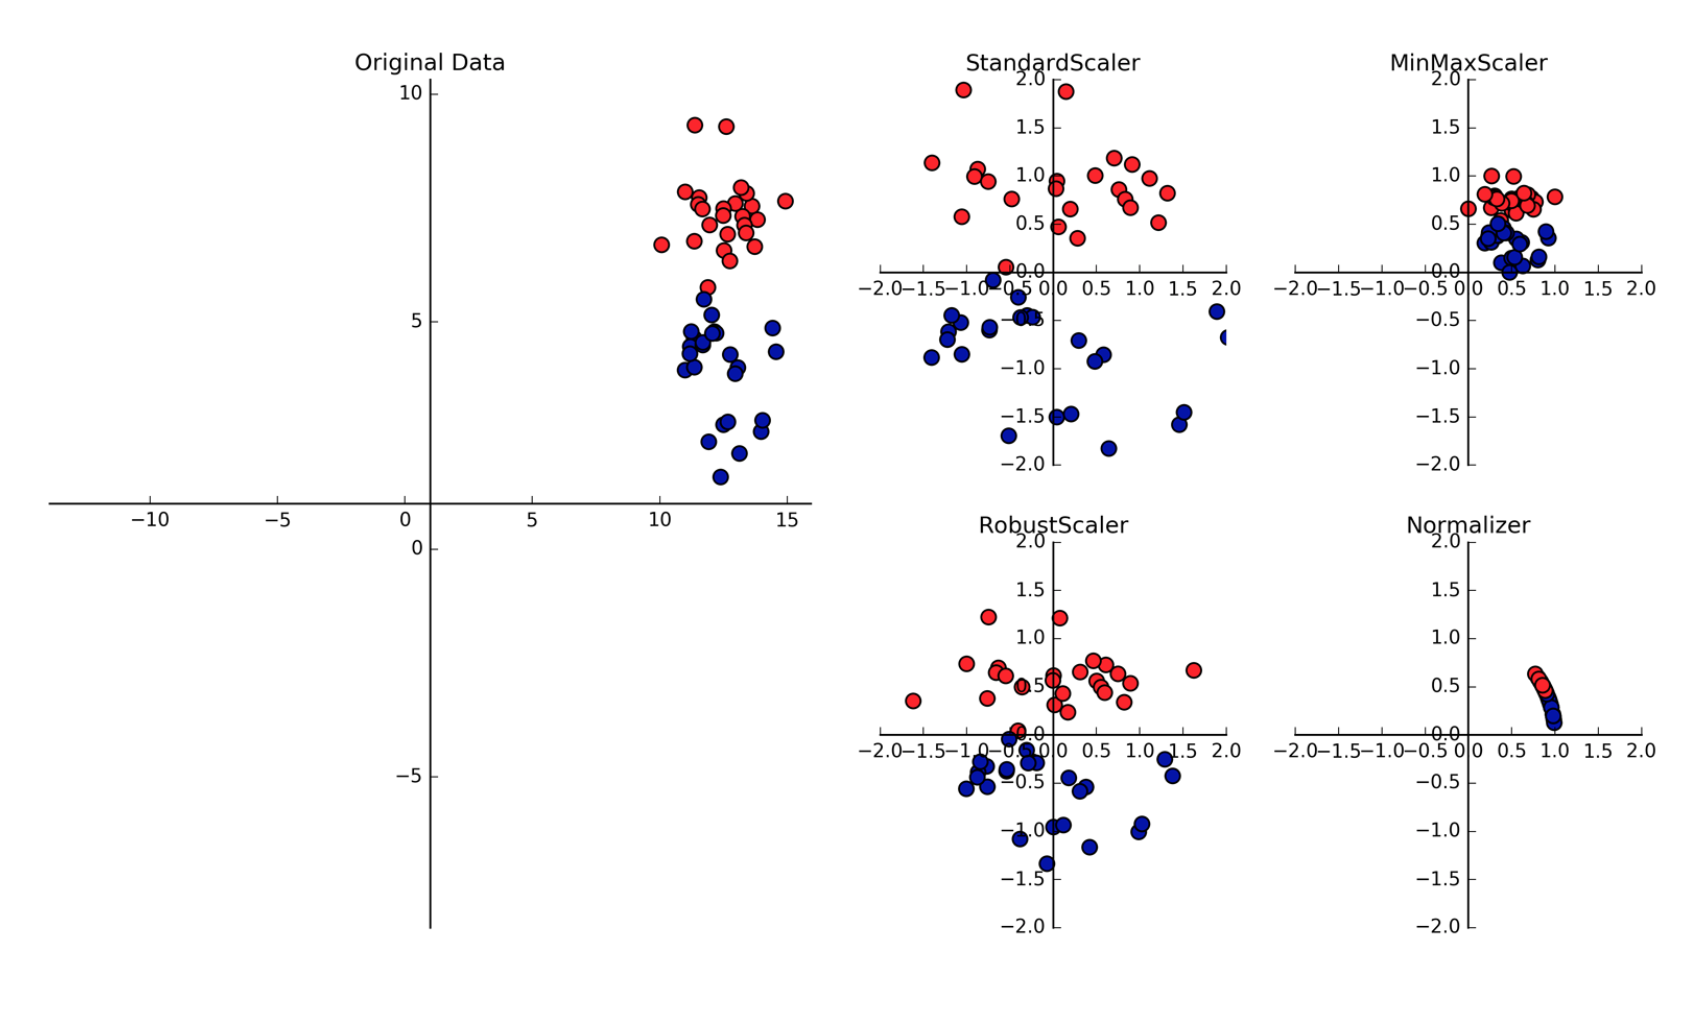

Normalization is another important concept needed to change all features to the same scale. This allows for **faster convergence on learning, and more uniform influence for all weights**.

**Tree-based models** are not dependent on scaling, but non-tree models models, very often are hugely dependent on it.

Outliers can affect certain scalers, and it is important to either remove them or choose a scalar that is robust towards them.

Fuente: https://python-data-science.readthedocs.io/en/latest/normalisation.html

[Return to Content of 5.5 RMF Analysis](#C5.5)

#### 5.6.1.1 log transformation as sort of Normalization
<a id='5.6.1.1'></a>

the "log" used here refers to natural o neperian logarithm of base=e or 2.72 aprox. As the ln(0) is not defined, should be an error or (inf).

The Log Transform is one of the most popular Transformation techniques out there. It is primarily used **to convert a skewed distribution to a normal distribution/less-skewed distribution**.
source:https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/#:~:text=The%20Log%20Transform%20is%20one,values%20as%20the%20column%20instead.&text=log(10000)%20%3D%204.

The "log transformation" is s done when the variables span several orders of magnitude. Income is a typical example: its distribution is "power law", meaning that the vast majority of incomes are small and very few are big.

This type of "fat tailed" distribution is studied in logarithmic scale because of the mathematical properties of the logarithm ... helps Making the values comparable.
Source: https://datascience.stackexchange.com/questions/40089/what-is-the-reason-behind-taking-log-transformation-of-few-continuous-variables

"Recency" for example seem to be a "fat tailed" distribution.

It is quite often to use the log transformation on your data, if your data are always positive (e.g. the price of something) and their scales varies drastically.

A simple criterion of whether you should use log transformation is whether you want to use a linear or log scale for your x-axis when you are plotting the histogram of your data.
source: https://stats.stackexchange.com/questions/302168/log-transformation-instead-of-z-score-normalizatrion-for-machine-learning

In [66]:
# apply log traformation
df_rfm_log = np.log(df_rfm)
df_rfm_log

,Recency,Frequency,Monetary
CustomerID,,,
12747,0.693147,2.397895,8.030543
12748,-inf,5.298317,10.122280
12749,1.098612,1.609438,8.302261
12820,1.098612,1.386294,6.828301
12821,5.365976,0.000000,4.529584
...,...,...,...
18280,5.624018,0.000000,5.196285
18281,5.192957,0.000000,4.392224
18282,1.945910,0.693147,5.100659


Ooops, we got some zero values in the data.

In [67]:
# let's check where those zeros exist in the data.
df_rfm[df_rfm.values == 0]  # only in the Recency values.

,Recency,Frequency,Monetary
CustomerID,,,
12748,0,200,24891.45
12985,0,2,1048.82
13069,0,24,3593.52
13113,0,24,5810.54
13426,0,10,3098.12
14051,0,23,11962.51
14422,0,6,3990.84
14441,0,4,1712.89
14446,0,4,998.90


The log operation has a dual role or purpouse:
1. Reducing the impact of too-low values
2. Reducing the impact of too-high values.

A small caveat though – **if our data has negative values or values ranging from 0 to 1, we cannot apply log transform directly**– since the log of negative numbers and numbers between 0 and 1 is undefined, we would get error or NaN values in our data.<br> In such cases, we can add a number to these values to make them all greater than 1. Then, we can apply the log transform.

In [68]:
# we can add 1 to the value manually or use np.log1p()
# np.log1p(): Returns the natural logarithm of one plus the input array, element-wise.
df_rfm_log = np.log1p(df_rfm)
df_rfm_log.describe()

,Recency,Frequency,Monetary
count,3818.000000,3818.000000,3818.000000
mean,3.802618,1.328704,6.322770
std,1.376123,0.663912,1.221246
min,0.000000,0.693147,1.064711
25%,2.890372,0.693147,5.494511
50%,3.931826,1.098612,6.312566
75%,4.976734,1.609438,7.163308
max,5.924256,5.303305,10.807509


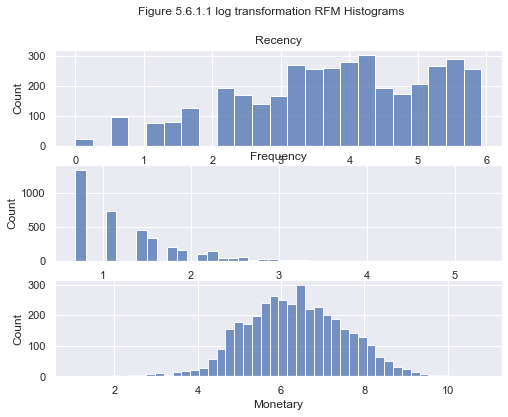

In [82]:
# plots again the histograms for each feature,
# so we notice if they are somehow normalized so RFM features
# can be easily compared
fig, axs = plt.subplots(3, figsize=(8,6))
fig.suptitle("Figure 5.6.1.1 log transformation RFM Histograms")
sns.histplot(df_rfm_log['Recency'], ax=axs[0])
axs[0].set_title("Recency")
sns.histplot(df_rfm_log['Frequency'], ax=axs[1])
axs[1].set_title("Frequency")
sns.histplot(df_rfm_log['Monetary'], ax=axs[2]);

Compared with figure 5.6 [*5.6 Clustering Algorithms for customer segmentation*](#5.6), we now notice a more compact scale, lets say from 0-10. Then a way to a more easy comparability of values, so the "log transformation" has being a usefull  procedure.

Log transforms are useful when applied to skewed distributions as they tend to expand the values which fall in the range of lower magnitudes and tend to compress or reduce the values which fall in the range of higher magnitudes. This tends to make the skewed distribution as normal-like as possible (Sarkar, Bali, & Sharma, 2018). 

This log transformation could be enough for normalization of feature scaling. Nevertheles Liu, K.(2022) also wanted to perform Standardization with StandardScaler(), maybe due to try to reduce even more the skewness of Recency and Frequency.

It is also important to keep in mind the following:

Normalization is:
> highly affected by outliers.
> considered when the algorithms do not make assumptions about the data distribution.

Standardization is:
> slightly affected by outliers.
> used when algorithms make assumptions about the data distribution.

source: 

Could be interesting visualizing the clusters with the k-means algorithm applyed to the df_rfm_log

[Return to Content of 5.5 RMF Analysis](#C5.5)

#### 5.6.1.1.1 Applying K-Means clustering to df_rfm_log
<a id='5.6.1.1.1'></a>

C:\Users\conza\Anaconda3\envs\TFKERAS\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.


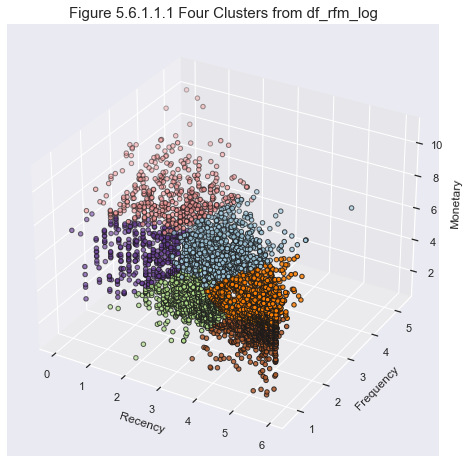

In [90]:
#let's create 6 clusters as it was done in Customer Segmentation

# import kmeans estimator
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6, random_state=42) 
clusters = kmeans.fit_predict(df_rfm_log)
cluster_center = kmeans.cluster_centers_
cluster_label = kmeans.labels_
cluster_center

#3D scatter plot with 4 clusters
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
%matplotlib inline

fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig)

ax.scatter(df_rfm_log.Recency, df_rfm_log.Frequency,
           df_rfm_log.Monetary, c=cluster_label, 
           edgecolor='k', cmap='Paired')

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('Figure 5.6.1.1.1 Four Clusters from df_rfm_log', fontsize=15);

From the above figure 5.6.1.1.1 we can differentiate those more Recently buyers (the less the number the more Recently). For Frequency the higher the Frequency the higher the total number of orders and similar to the Monetary.

In [88]:
df_rfm_log

,Recency,Frequency,Monetary
CustomerID,,,
12747,1.098612,2.484907,8.030868
12748,0.000000,5.303305,10.122320
12749,1.386294,1.791759,8.302509
12820,1.386294,1.609438,6.829383
12821,5.370638,0.693147,4.540312
...,...,...,...
18280,5.627621,0.693147,5.201806
18281,5.198497,0.693147,4.404522
18282,2.079442,1.098612,5.106733


Next, we can observe the differences if do Standardization to the df_rfm_log

[Return to Content of 5.5 RMF Analysis](#C5.5)

#### 5.6.1.2 Standardization with StandardScaler() to df_rfm_log
<a id='5.6.1.2'></a>

Now, we **standardize features** by applying StandardScaler()

In [91]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#fit and then tranform the data
df_rfm_scaled = scaler.fit_transform(df_rfm_log) 

#convert output to dataframe
df_rfm_scaled = pd.DataFrame(data=df_rfm_scaled,
                             index=df_rfm.index,
                             columns=df_rfm.columns) 
df_rfm_scaled.describe()

,Recency,Frequency,Monetary
count,3.818000e+03,3.818000e+03,3.818000e+03
mean,3.161395e-17,2.881113e-16,-5.725587e-16
std,1.000131e+00,1.000131e+00,1.000131e+00
min,-2.763645e+00,-9.574159e-01,-4.306053e+00
25%,-6.629968e-01,-9.574159e-01,-6.782973e-01
50%,9.390510e-02,-3.466148e-01,-8.356783e-03
75%,8.533175e-01,4.229036e-01,6.883528e-01
max,1.541952e+00,5.987422e+00,3.672747e+00


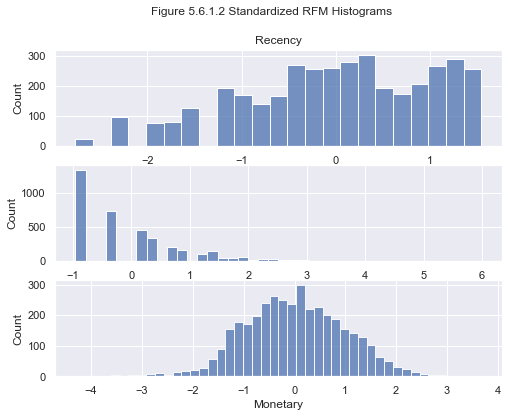

In [92]:
fig, axs = plt.subplots(3, figsize=(8,6))
fig.suptitle("Figure 5.6.1.2 Standardized RFM Histograms")
sns.histplot(df_rfm_scaled['Recency'], ax=axs[0])
axs[0].set_title("Recency")
sns.histplot(df_rfm_scaled['Frequency'], ax=axs[1])
sns.histplot(df_rfm_scaled['Monetary'], ax=axs[2]);

All the data have been standardized now. Nevertheles Recency and Frequency still a little bit skewed.

However, we just stop here for this example.

[Return to Content of 5.5 RMF Analysis](#C5.5)

#### 5.6.2 Applying K-Means clustering
<a id='5.6.2'></a>

[Return to Content of 5.5 RMF Analysis](#C5.5)

In [100]:
#let's also do 6 clusters 
# import kmeans estimator
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6, random_state=42) 
clusters = kmeans.fit_predict(df_rfm_scaled)
cluster_center = kmeans.cluster_centers_
cluster_lable = kmeans.labels_
cluster_center

array([[-0.37406542, -0.6330482 , -0.59565972],
       [ 0.03778773,  0.5670162 ,  0.70217564],
       [-1.38745633,  0.48574496,  0.50233733],
       [ 0.92176539, -0.57181019, -0.18586865],
       [-1.28972928,  2.10275068,  1.64087171],
       [ 0.99251081, -0.88676858, -1.40405598]])

[Return to Content of 5.5 RMF Analysis](#C5.5)

#### 5.6.3 Visualising clusters
<a id='5.6.3'></a>

[Return to Content of 5.5 RMF Analysis](#C5.5)

In [101]:
from mpl_toolkits.mplot3d import Axes3D

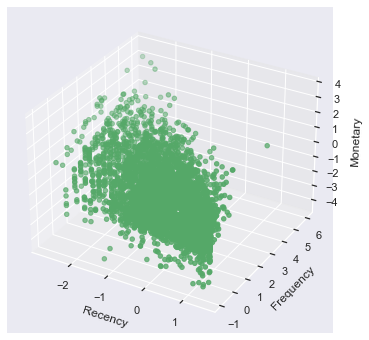

In [102]:
# plot a 3D figure without clusters
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
%matplotlib inline

fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection='3d')
ax.scatter3D(df_rfm_scaled.Recency, df_rfm_scaled.Frequency,
             df_rfm_scaled.Monetary, c='g')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary');

C:\Users\conza\Anaconda3\envs\TFKERAS\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  This is separate from the ipykernel package so we can avoid doing imports until


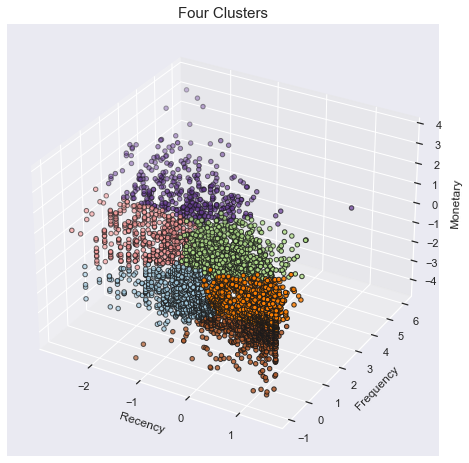

In [103]:
#3D scatter plot with 4 clusters
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig)

ax.scatter(df_rfm_scaled.Recency, df_rfm_scaled.Frequency,
           df_rfm_scaled.Monetary, c=cluster_lable, 
           edgecolor='k', cmap='Paired')

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('Four Clusters', fontsize=15);

We might tell from above that the Orange cluster is important to visualize the most Recent buyers. The green and purple clusters the most frequent buyers and the purple cluster with higher Monetary value.

[Return to Content of 5.5 RMF Analysis](#C5.5)

#### 5.6.4 Determining the right number of clusters
<a id='5.6.4'></a>

[Return to Content of 5.5 RMF Analysis](#C5.5)

First, let's see how we can use the Elbow method to select the right number of clusters                                         

In [97]:
inertia = []  # create an empty list
for n_clusters in range(1, 10):
    kmeans = KMeans(n_clusters=n_clusters,random_state=42)
    kmeans.fit(df_rfm_scaled)
    # append the inertia values from each model to the list
    inertia.append(kmeans.inertia_)

**Note**: Inertia is the sum of squared distances of datapoints to their closest cluster centre.

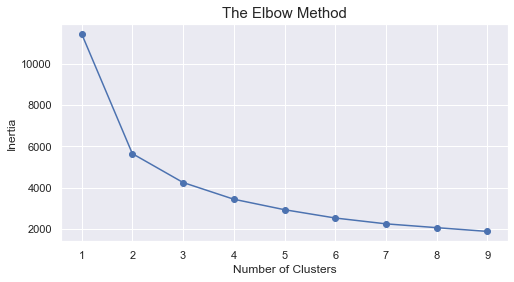

In [98]:
df_inertia = pd.DataFrame({'Cluster': range(1, 10), 
                           'Inertia': inertia})
plt.figure(figsize=(8, 4))
plt.plot(df_inertia.Cluster, df_inertia.Inertia, '-o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('The Elbow Method', fontsize=15);

Looking at the Elbow plot above, it seems that 2 or 3 is where the elbow starts. Let's choose 3 clusters and fit the model. 

C:\Users\conza\Anaconda3\envs\TFKERAS\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  


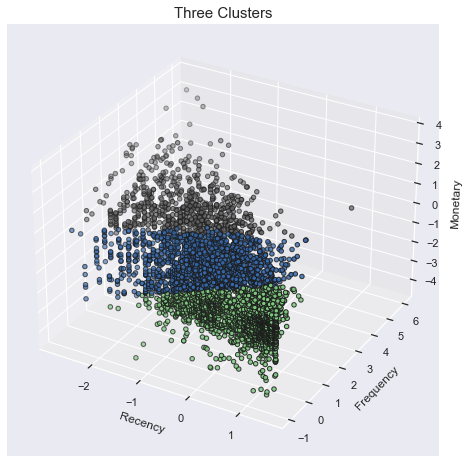

In [99]:
# train kmeans model
kmeans = KMeans(n_clusters=3,random_state=42)
clusters = kmeans.fit_predict(df_rfm_scaled)
cluster_lable = kmeans.labels_

# 3D scatter plot with 3 clusters
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig)
ax.scatter(df_rfm_scaled.Recency, df_rfm_scaled.Frequency,
           df_rfm_scaled.Monetary, c=cluster_lable, 
           edgecolor='k', cmap='Accent')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('Three Clusters', fontsize=15);

<span style='background:beige'>However, note that the elbow method is sometimes ambiguous.</span> An alternative is the average silhouette method (Kaufman and Rousseeuw,1990)

In [82]:
from sklearn.metrics import silhouette_score

**Note**: silhouette coefficients has a range of [-1, 1]. Closer to 1 means better.

In [83]:
# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed clusters

for n_clusters in range(2, 20):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(df_rfm_scaled)
    clusters = kmeans.predict(df_rfm_scaled)
    sil_avg = silhouette_score(df_rfm_scaled, clusters)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", sil_avg)

For n_clusters = 2 The average silhouette_score is : 0.4337451049965268
For n_clusters = 3 The average silhouette_score is : 0.340529381288137
For n_clusters = 4 The average silhouette_score is : 0.3333115356295476
For n_clusters = 5 The average silhouette_score is : 0.3112774723320785
For n_clusters = 6 The average silhouette_score is : 0.29398494681694687
For n_clusters = 7 The average silhouette_score is : 0.28686571970475655
For n_clusters = 8 The average silhouette_score is : 0.28672610534596366
For n_clusters = 9 The average silhouette_score is : 0.2880180188571036
For n_clusters = 10 The average silhouette_score is : 0.2941041384796828
For n_clusters = 11 The average silhouette_score is : 0.2843928088198798
For n_clusters = 12 The average silhouette_score is : 0.2763225685785895
For n_clusters = 13 The average silhouette_score is : 0.2807078366621835
For n_clusters = 14 The average silhouette_score is : 0.28031162230694046
For n_clusters = 15 The average silhouette_score is : 0.

Clearly 2 clusters gives the highest silhouette score

C:\Users\conza\Anaconda3\envs\TFKERAS\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  


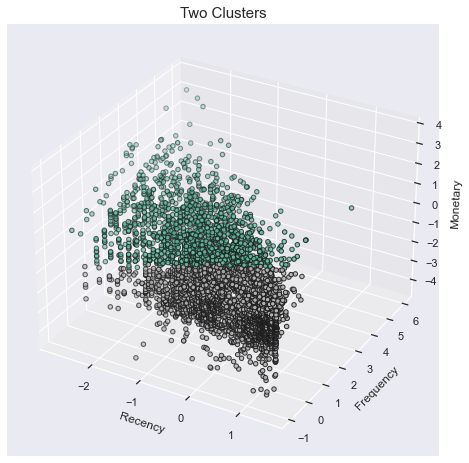

In [84]:
# set n_clsuters to 2
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(df_rfm_scaled)
cluster_lable = kmeans.labels_

# 3D scatter plot with 2 clusters
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig)

ax.scatter(df_rfm_scaled.Recency, df_rfm_scaled.Frequency,
           df_rfm_scaled.Monetary, c=cluster_lable, edgecolor='k', cmap='Set2')

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('Two Clusters', fontsize=15);

C:\Users\conza\Anaconda3\envs\TFKERAS\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  


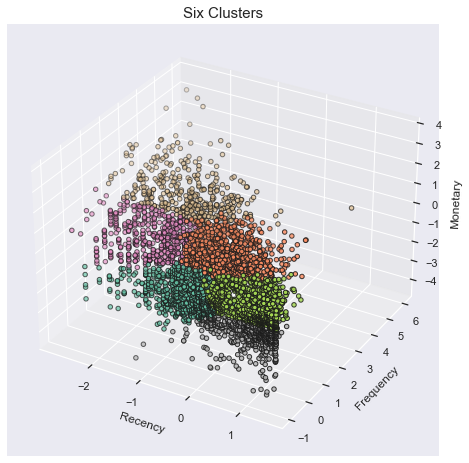

In [85]:
# train kmeans model with 6 clusters
kmeans = KMeans(n_clusters=6,random_state=42)
clusters = kmeans.fit_predict(df_rfm_scaled)
cluster_lable = kmeans.labels_

# 3D scatter plot with 3 clusters
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig)

ax.scatter(df_rfm_scaled.Recency, df_rfm_scaled.Frequency,
           df_rfm_scaled.Monetary, c=cluster_lable, 
           edgecolor='k', cmap='Set2')

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('Six Clusters', fontsize=15);

**Conclusion**: Since the data are not clearly differentiated in the 3D plot, I would argue that either 2 or 6 clusters would be fine, depending on how you want to categorise your customers into different groups.

[Return to Content of 5.5 RMF Analysis](#C5.5)

## 5.7 References
<a id='5.7'></a>

[Return to Content of 5.5 RMF Analysis](#C5.5)

Liu, K. (2022). Supply Chain Analytics: Concepts, Techniques and Applications. Palgrave Macmillan.

McKinney, W. (2018). Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython. 2nd. Ed. O’Reilly.

Sarkar, D., Bali, R., & Sharma, T. (2018). Practical Machine Learning with Python: A Problem-Solver’s Guide to Building Real-World Intelligent Systems. Apress.

[Return to Content of 5.5 RMF Analysis](#C5.5)